<h1 style="text-align:center;">Laboratorio 5</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Mariana David</h4>
<h5 style="text-align:center;">1/9/2023</h5>

## Librerias

In [24]:
import pandas as pd
import re
import io 
from cgitb import text
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

1. Descargue el archivo train.csv 

In [25]:
df = pd.read_csv('data/train.csv')

2. Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje. 

In [26]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


3. Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento 
que llevó a cabo. 

3.1.  Se pueden hacer tareas como: 
- Convertir el texto a mayúsculas o a minúsculas 

In [27]:
df['text'].str.lower()
df['location'].str.lower()
df['keyword'].str.lower()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 7613, dtype: object

- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [28]:
df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')

C:\Users\cjrba\AppData\Local\Temp\ipykernel_12724\2394621819.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
C:\Users\cjrba\AppData\Local\Temp\ipykernel_12724\2394621819.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
C:\Users\cjrba\AppData\Local\Temp\ipykernel_12724\2394621819.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')


- Quitar las url 

In [29]:
df.text = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in df.text]
df.text = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in df.text]

- Revisar si hay emoticones y quitarlos

In [30]:
df.text = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in df.text]

- Quitar los signos de puntuación 

In [31]:
# Función para quitar signos de puntuación
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Aplicar la función a la columna 'text'
df['text'] = df['text'].apply(remove_punctuation)

# Mostrar el DataFrame resultante
print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this earthquake Ma...       1  
1                 Forest fire near La Ronge Sask Canada       1  
2     All residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     Just got sent this photo from Ruby Alaska as s...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary TheTawniest The out of control wild...       1  
7610  M194 0104 UTC5k

- Quitar los artículos, preposiciones y conjunciones (stopwords) 

In [32]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')  # You might need to download NLTK data for stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjrba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:


stopwords = set(stopwords.words('english') + ['the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp'])
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2']
for i in expresiones:
    stopwords.add(i)

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

clean_tweets = df['text_without_stopwords']
print(df['text_without_stopwords'])

0        Our Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       All residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610    M194 0104 UTC5km S Volcano Hawaii httptcozDtoy...
7611    Police investigating ebike collided car Little...
7612    Latest More Homes Razed Northern California Wi...
Name: text_without_stopwords, Length: 7613, dtype: object


- Quitar números si considera que interferirán en la clasificación (quizá debería valorar 
si quitar o no el 911). 

In [38]:
import pandas as pd
import re

# Crear una función para preprocesar el texto
def preprocesar_texto(texto):
    return re.sub(r'\d+', '', texto.lower())

# Suponiendo que ya tienes un DataFrame llamado 'df' con una columna 'text'
df['texto_preprocesado'] = clean_tweets.apply(preprocesar_texto)

# Mostrar las primeras filas para ver los cambios
df[['text', 'texto_preprocesado']].head()

,text,texto_preprocesado
0,Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada
2,All residents asked to shelter in place are be...,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...,people receive wildfires evacuation orders in...
4,Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby alaska as s...


In [35]:
#Para observar como va la data
clean_tweets.to_csv('output/newTrain.csv', index=False,encoding='utf-8')

4. Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. ¿Qué 
palabras cree que le servirán para hacer un mejor modelo de clasificación?¿vale la pena explorar 
bigramas o trigramas para analizar contexto? 

In [36]:
frec_dic_tweets = {}
for word in clean_tweets:
    if word in frec_dic_tweets:
        frec_dic_tweets[word] += 1
    else:
        frec_dic_tweets[word] = 1

tweets_frecuency = pd.DataFrame.from_dict(frec_dic_tweets, orient='index')
tweets_frecuency

,0
Our Deeds Reason earthquake May ALLAH Forgive us,1
Forest fire near La Ronge Sask Canada,1
All residents asked shelter place notified officers No evacuation shelter place orders expected,1
13000 people receive wildfires evacuation orders California,1
Just got sent photo Ruby Alaska smoke wildfires pours school,1
...,...
Officials say quarantine place Alabama home possible Ebola case developing symptoms httptcorqKK15uhEY,1
flip side Walmart bomb everyone evacuate stay tuned blow,1
Suicide bomber kills 15 Saudi security site mosque Reuters via World Google News Wall httptconF4IculOje,1
Two giant cranes holding bridge collapse nearby homes httptcoSTfMbbZFB5,1


In [39]:
from collections import Counter, defaultdict
# Verificar el recuento de ejemplos en cada etiqueta
print("Recuento de ejemplos por etiqueta:")
print(df['target'].value_counts())

# Mostrar algunas muestras de texto para cada etiqueta
for etiqueta in df['target'].unique():
    print(f"\nEjemplos de la etiqueta {etiqueta}:")
    ejemplos = df[df['target'] == etiqueta]['preprocessed_text'].head(5)  # Muestra las primeras 5 muestras
    for i, ejemplo in enumerate(ejemplos, start=1):
        print(f"{i}. {ejemplo}")

# Calcular las palabras más comunes nuevamente
palabras_comunes = {}

for etiqueta in df['target'].unique():
    df_filtrado = df[df['target'] == etiqueta]
    contador = Counter(palabra for lista_palabras in df_filtrado['preprocessed_text'] for palabra in lista_palabras)
    palabra_mas_comun = contador.most_common(1)[0][0]
    palabras_comunes[etiqueta] = palabra_mas_comun

# Imprimir las palabras más comunes por etiqueta
for etiqueta, palabra in palabras_comunes.items():
    print(f"Palabra más común para etiqueta {etiqueta}: {palabra}")


Recuento de ejemplos por etiqueta:
0    4342
1    3271
Name: target, dtype: int64

Ejemplos de la etiqueta 1:


KeyError: 'preprocessed_text'

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Obtener la frecuencia de palabras para tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener la frecuencia de palabras para tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Tokenizar y contar palabras en tweets de desastres
disaster_words = ' '.join(disaster_tweets).split()
disaster_word_frequency = Counter(disaster_words)

# Tokenizar y contar palabras en tweets que no son de desastres
non_disaster_words = ' '.join(non_disaster_tweets).split()
non_disaster_word_frequency = Counter(non_disaster_words)

# Imprimir las 20 palabras más comunes en tweets de desastres
print("Palabras más comunes en tweets de desastres:")
print(disaster_word_frequency.most_common(20))

# Imprimir las 20 palabras más comunes en tweets que no son de desastres
print("\nPalabras más comunes en tweets que no son de desastres:")
print(non_disaster_word_frequency.most_common(20))

# Graficar las 20 palabras más comunes en ambos grupos
plt.figure(figsize=(12, 6))
plt.barh(*zip(*disaster_word_frequency.most_common(20)), label='Desastres', alpha=0.7)
plt.barh(*zip(*non_disaster_word_frequency.most_common(20)), label='No Desastres', alpha=0.7)
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Palabras más comunes en tweets de Desastres vs. No Desastres')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


### Bigrama

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

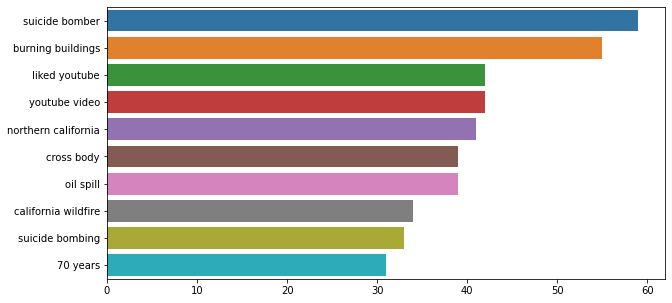

In [41]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(clean_tweets)[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

### Trigrama

In [42]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

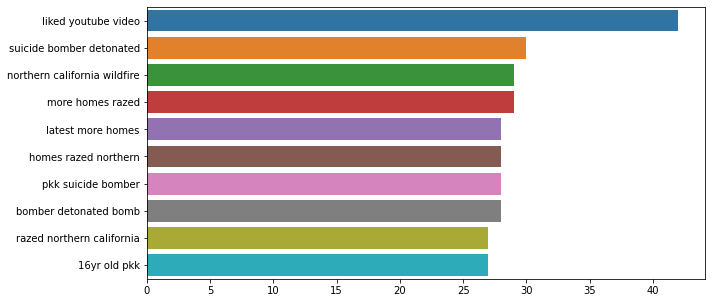

In [43]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(clean_tweets)[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

In [44]:
import numpy as np

tweets = df['text_without_stopwords'].tolist()

# Función para obtener los n-gramas más frecuentes y sus probabilidades en los tuits
def obtener_ngramas_top(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    matriz_frecuencias = vec.transform(corpus)
    suma_palabras = matriz_frecuencias.sum(axis=0)
    total_palabras = np.sum(suma_palabras)
    frecuencias_palabras = [(palabra, suma_palabras[0, idx]) for palabra, idx in vec.vocabulary_.items()]
    frecuencias_palabras = sorted(frecuencias_palabras, key=lambda x: x[1], reverse=True)
    
    # Calcular probabilidades
    ngramas_probabilidades = [(palabra, frecuencia, frecuencia / total_palabras) for palabra, frecuencia in frecuencias_palabras]
    
    return ngramas_probabilidades[:n]

# Obtener y mostrar los bigramas más frecuentes y sus probabilidades
top_bigramas = obtener_ngramas_top(tweets, ngram_range=(2, 2), n=10)
print("Top 10 Bigramas más Frecuentes:")
for bigrama, frecuencia, probabilidad  in top_bigramas:
    print(f"Bigrama: {bigrama}, Frecuencia: {frecuencia:.6f}, Probabilidad: {probabilidad:.6f}")

# Obtener y mostrar los trigramas más frecuentes y sus probabilidades
top_trigramas = obtener_ngramas_top(tweets, ngram_range=(3, 3), n=10)
print("\nTop 10 Trigramas más Frecuentes:")
for trigrama, frecuencia, probabilidad  in top_trigramas:
    print(f"Trigrama: {trigrama}, Frecuencia: {frecuencia:.6f}, Probabilidad: {probabilidad:.6f}")


Top 10 Bigramas más Frecuentes:
Bigrama: suicide bomber, Frecuencia: 59.000000, Probabilidad: 0.000845
Bigrama: burning buildings, Frecuencia: 55.000000, Probabilidad: 0.000788
Bigrama: liked youtube, Frecuencia: 42.000000, Probabilidad: 0.000602
Bigrama: youtube video, Frecuencia: 42.000000, Probabilidad: 0.000602
Bigrama: northern california, Frecuencia: 41.000000, Probabilidad: 0.000587
Bigrama: cross body, Frecuencia: 39.000000, Probabilidad: 0.000559
Bigrama: oil spill, Frecuencia: 39.000000, Probabilidad: 0.000559
Bigrama: california wildfire, Frecuencia: 34.000000, Probabilidad: 0.000487
Bigrama: suicide bombing, Frecuencia: 33.000000, Probabilidad: 0.000473
Bigrama: 70 years, Frecuencia: 31.000000, Probabilidad: 0.000444

Top 10 Trigramas más Frecuentes:
Trigrama: liked youtube video, Frecuencia: 42.000000, Probabilidad: 0.000675
Trigrama: suicide bomber detonated, Frecuencia: 30.000000, Probabilidad: 0.000482
Trigrama: northern california wildfire, Frecuencia: 29.000000, Proba

Basado en los resultados, las palabras que podrían servir para un mejor modelo de clasificación son aquellas que son distintivas y específicas del contexto de desastres, como "forest fire", "evacuation", "earthquake", etc. Además, explorar bigramas y trigramas es valioso para capturar relaciones de palabras significativas y contextuales en los tweets, lo que podría mejorar la capacidad del modelo para analizar el contexto.



5. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis 
5.1.  Puede, para cada archivo: 
- Investigar qué palabra se repite más en cada una de las categorías 
- Hacer una nube de palabras para visualizar las que aparecen con más frecuencia 
- Hacer un histograma con las palabras que más se repiten
- Discutir sobre las palabras que tienen presencia en todas las categorías. 
- Determinar las palabras positivas, negativas o neutras 
6. Teniendo en cuenta la cantidad de palabras positivas y negativas del tweet determine qué tan 
positivo, negativo o neutral es el mismo. 
7. Luego de analizar los datos determine: 
7.1.  ¿Cuáles son los 10 tweets más negativos?¿En qué categoría están? 
7.2.  ¿Cuáles son los 10 tweets más positivos? ¿En qué categoría están? 
7.3.  ¿Son los tweets de la categoría que indica que habla de un desastre real más negativos que 
los de la otra categoría? 
8. Cree una variable que contenga la “negatividad” de cada tweet.  Inclúyala  en  el  conjunto  de 
datos y entrene nuevamente el modelo de clasificación de la hoja pasada. ¿La inclusión de esta 
variable mejoró los resultados del modelo de clasificación?